# 청와대 청원 데이터 분석하기 

## 웹크롤링

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
titles = []
start_date = []
end_date = []
num_consent = []
answer_date = []
address = []

def get_info(url): 
    res = urlopen(url)
    soup = BeautifulSoup(res, "html.parser")
    
    # get titles, address(url)
    contents = soup.find_all('div', class_='ans_name_title')
    for n in range(0,len(contents)):
        content = contents[n]
        titles.append(content.a.get_text())
        add_url = str(content.find('a')['href'])
        address.append('https://www1.president.go.kr'+add_url)
    
    # 청원시작과 끝 날짜, 참여인원, 답변일 정보 얻기 
    infos = soup.find_all('ol', class_='ans_name_info')
    for info in infos: 
        start_date.append(info.find('p', class_='ans_list1_2').get_text()[2:-2])
        end_date.append(info.find('p', class_='ans_list2_2').get_text()[2:-2])
        num_consent.append(info.find('p', class_='ans_list3_2').get_text()[2:-2])
        answer_date.append(info.find('p', class_='ans_list4_2').get_text()[2:-2])          

In [3]:
for n in range(1,13): 
    url = 'https://www1.president.go.kr/petitions/answer?page=%d' % n
    get_info(url)

In [4]:
data = {'제목':titles, '청원시작일':start_date, '청원종료일': end_date,
       '참여인원': num_consent, 'URL':address}
df = pd.DataFrame(data)
df

,제목,청원시작일,청원종료일,참여인원,URL
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020. 04. 07,2020. 05. 07,"273,513",https://www1.president.go.kr/petitions/587827
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020. 04. 02,2020. 05. 02,"1,007,040",https://www1.president.go.kr/petitions/587624
2,세월호 전면재수사,2020. 04. 01,2020. 05. 01,"216,118",https://www1.president.go.kr/petitions/587604
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,2020. 03. 27,2020. 04. 26,"207,563",https://www1.president.go.kr/petitions/587334
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,2020. 03. 25,2020. 04. 24,"385,617",https://www1.president.go.kr/petitions/587169
...,...,...,...,...,...
169,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원",2017. 11. 17,2017. 12. 17,"281,985",https://www1.president.go.kr/petitions/45581
170,조두순 출소반대,2017. 09. 06,2017. 12. 05,"615,354",https://www1.president.go.kr/petitions/10949
171,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,2017. 11. 04,2017. 12. 04,"216,774",https://www1.president.go.kr/petitions/26024
172,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,2017. 09. 30,2017. 10. 30,"235,372",https://www1.president.go.kr/petitions/18278


In [5]:
df.to_csv('BlueHouse Petition data.csv', sep=',', encoding='utf-8')

In [6]:
import pandas as pd

petition = pd.read_csv('BlueHouse Petition data.csv', thousands=',', encoding='utf-8', index_col=0)
petition.head()

,제목,청원시작일,청원종료일,참여인원,URL
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020. 04. 07,2020. 05. 07,273513,https://www1.president.go.kr/petitions/587827
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020. 04. 02,2020. 05. 02,1007040,https://www1.president.go.kr/petitions/587624
2,세월호 전면재수사,2020. 04. 01,2020. 05. 01,216118,https://www1.president.go.kr/petitions/587604
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,2020. 03. 27,2020. 04. 26,207563,https://www1.president.go.kr/petitions/587334
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,2020. 03. 25,2020. 04. 24,385617,https://www1.president.go.kr/petitions/587169


In [7]:
len(petition)

174

In [8]:
import re 
import time
from tqdm import tqdm_notebook
from urllib.request import urlopen
from bs4 import BeautifulSoup

category =[]
content = []
answer = []

for n in tqdm_notebook(petition.index): 
    url = urlopen(petition['URL'][n]) 
    if n / 2 == 0:
        time.sleep(1)
    else: 
        time.sleep(2)
    soup = BeautifulSoup(url, "html.parser") 
    
    # get category 
    sector = soup.find('ul', class_='petitionsView_info_list')
    try: 
        category.append(sector.li.get_text()[4:])
    except AttributeError:
        print('AttributeError: index-', n, 'URL-', petition['URL'][n])
    
    # get petition content 
    content_raw = soup.find_all('div', class_='View_write')
    try: 
        if len(content_raw) > 1:
            content_raw_text = content_raw[1].get_text()
        else: 
            content_raw_text = content_raw[0].get_text()   
    except IndexError: 
        print('IndexError:', petition['URL'][n])
    
    content_split = re.split('\r|\t|\n|\xa0', content_raw_text)
    content.append(''.join(content_split))

    # get petition answer 
    answer_raw = soup.find_all('div', class_='pr_tk25')
    if len(answer_raw) > 1: 
        answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[1].get_text())
    else: 
        answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[0].get_text())
    answer_raw_text = ' '.join(answer_raw_text)
    answer.append(answer_raw_text[7:]) 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [9]:
print(len(category), len(content), len(answer))

174 174 174


In [10]:
petition['카테고리'] = category
petition['청원내용'] = content
petition['청원답변'] = answer

In [11]:
petition[petition['청원내용'] == '']

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원답변
144,합정 **** 불법 누드촬영,2018. 05. 17,2018. 06. 16,201590,https://www1.president.go.kr/petitions/235102,인권/성평등,,
145,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2018. 03. 23,2018. 04. 22,209494,https://www1.president.go.kr/petitions/173355,안전/환경,,
146,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,2018. 05. 11,2018. 06. 10,419006,https://www1.president.go.kr/petitions/230552,인권/성평등,,
149,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,2018. 04. 17,2018. 05. 17,302082,https://www1.president.go.kr/petitions/203181,행정,,


In [14]:
for n in [144, 145, 146, 149]: 
    url = urlopen(petition['URL'][n]) 
    soup = BeautifulSoup(url, "html.parser") 
    
    # get petition content 
    content_raw = soup.find_all('div', class_='View_write')
    content_raw_text = content_raw[2].get_text()   
    content_split = re.split('\r|\t|\n|\xa0', content_raw_text)
    petition['청원내용'][n] = ''.join(content_split)
    
    # get petition answer 
    answer_raw = soup.find_all('div', class_='pr_tk25')
    answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[2].get_text())
    answer_raw_text = ' '.join(answer_raw_text)
    petition['청원답변'][n] = answer_raw_text[7:]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [17]:
petition[144:150]

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원답변
144,합정 **** 불법 누드촬영,2018. 05. 17,2018. 06. 16,201590,https://www1.president.go.kr/petitions/235102,인권/성평등,한 유명 유튜버의 사례저는 성범죄 피해자입니다. 꼭 한번만 제 이야기를 들어주세요....,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...
145,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2018. 03. 23,2018. 04. 22,209494,https://www1.president.go.kr/petitions/173355,안전/환경,2012년 전국의 몰카범죄는 2400건 2015년에 들어 3배 이상 증가해 무려 7...,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...
146,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,2018. 05. 11,2018. 06. 10,419006,https://www1.president.go.kr/petitions/230552,인권/성평등,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.사건은 굉장히 빠르게 처리되...,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...
147,미세먼지의 위험 그리고 오염 및 중국에대한 항의,2018. 03. 24,2018. 04. 23,278128,https://www1.president.go.kr/petitions/174292,안전/환경,미세먼지가 10년전에 비해 상당히 자주 몰려오고있습니다.언론에서도 중국발이라고 얘기...,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 ...
148,GMO완전표시제 시행을 촉구합니다!,2018. 03. 12,2018. 04. 11,216886,https://www1.president.go.kr/petitions/164255,기타,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,<정혜승 뉴미디어 비서관> - 안녕하세요. 뉴미디어비서관 정혜승입니다. 오늘 1...
149,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,2018. 04. 17,2018. 05. 17,302082,https://www1.president.go.kr/petitions/203181,행정,다산신도시 입주민들이 택배원 대상으로 갑질을 저질러 사회적으로 큰 물의를 빚은 바 ...,<뉴미디어비서관> - 안녕하세요. 뉴미디어비서관 정혜승입니다. 오늘 11시 50분...


In [18]:
petition.to_csv('Final BlueHouse Petition data.csv', sep=',', encoding='utf-8')

### EDA

In [3]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
petition = pd.read_csv('Final BlueHouse Petition data.csv', 
                       index_col=0, parse_dates=['청원시작일','청원종료일'])
petition.head()

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원답변
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020-04-07,2020-05-07,273513,https://www1.president.go.kr/petitions/587827,문화/예술/체육/언론,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-04-02,2020-05-02,1007040,https://www1.president.go.kr/petitions/587624,기타,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...
2,세월호 전면재수사,2020-04-01,2020-05-01,216118,https://www1.president.go.kr/petitions/587604,기타,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,2020-03-27,2020-04-26,207563,https://www1.president.go.kr/petitions/587334,행정,2주 자가격리를 어기고 제주도 4박5일 여행을 다녀온 강남구 **번 확진자와 같은 ...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,2020-03-25,2020-04-24,385617,https://www1.president.go.kr/petitions/587169,기타,지금 우리나라뿐 아니라 모든 나라가 코로나19사태로 어려움을 겪고 있습니다.우리나라...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...


#### 청원 기간 확보하기

In [5]:
petition['청원기간'] = (petition['청원종료일'] - petition['청원시작일']).dt.days
petition.head(3)         

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원답변,청원기간
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020-04-07,2020-05-07,273513,https://www1.president.go.kr/petitions/587827,문화/예술/체육/언론,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...,30
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-04-02,2020-05-02,1007040,https://www1.president.go.kr/petitions/587624,기타,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,30
2,세월호 전면재수사,2020-04-01,2020-05-01,216118,https://www1.president.go.kr/petitions/587604,기타,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...,30


In [6]:
petition['청원기간'].unique()

array([30, 90, 60])

In [7]:
columns = ['제목','카테고리','청원시작일','청원종료일','청원기간','참여인원','청원내용','청원답변','URL']
petition = petition[columns]
petition.head()

,제목,카테고리,청원시작일,청원종료일,청원기간,참여인원,청원내용,청원답변,URL
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,문화/예술/체육/언론,2020-04-07,2020-05-07,30,273513,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...,https://www1.president.go.kr/petitions/587827
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,기타,2020-04-02,2020-05-02,30,1007040,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,https://www1.president.go.kr/petitions/587624
2,세월호 전면재수사,기타,2020-04-01,2020-05-01,30,216118,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...,https://www1.president.go.kr/petitions/587604
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,행정,2020-03-27,2020-04-26,30,207563,2주 자가격리를 어기고 제주도 4박5일 여행을 다녀온 강남구 **번 확진자와 같은 ...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...,https://www1.president.go.kr/petitions/587334
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,기타,2020-03-25,2020-04-24,30,385617,지금 우리나라뿐 아니라 모든 나라가 코로나19사태로 어려움을 겪고 있습니다.우리나라...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...,https://www1.president.go.kr/petitions/587169


In [8]:
petition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 9 columns):
제목       174 non-null object
카테고리     174 non-null object
청원시작일    174 non-null datetime64[ns]
청원종료일    174 non-null datetime64[ns]
청원기간     174 non-null int64
참여인원     174 non-null int64
청원내용     174 non-null object
청원답변     171 non-null object
URL      174 non-null object
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 13.6+ KB


In [9]:
petition['카테고리'].value_counts()

인권/성평등         46
정치개혁           24
기타             23
안전/환경          22
문화/예술/체육/언론    15
육아/교육          10
반려동물            8
보건복지            6
외교/통일/국방        5
교통/건축/국토        5
행정              3
성장동력            2
경제민주화           2
미래              2
일자리             1
Name: 카테고리, dtype: int64

#### Top 10 청원

In [10]:
petition.sort_values(by='참여인원', ascending=False).head(10)

,제목,카테고리,청원시작일,청원종료일,청원기간,참여인원,청원내용,청원답변,URL
26,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,안전/환경,2020-03-18,2020-04-17,30,2715626,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,https://www1.president.go.kr/petitions/586819
27,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,안전/환경,2020-03-20,2020-04-19,30,2026252,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,https://www1.president.go.kr/petitions/586880
73,자유 한국당 정당해산 청원,정치개혁,2019-04-22,2019-05-22,30,1831900,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,안녕하십니까. 청와대 정무수석 강기정입니다. 오늘은 청와대 국민청원 답변을 위해...,https://www1.president.go.kr/petitions/579682
21,문재인 대통령님을 응원 합니다!,기타,2020-02-26,2020-03-27,30,1504597,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,https://www1.president.go.kr/petitions/585683
20,문재인 대통령 탄핵을 촉구합니다.,정치개혁,2020-02-04,2020-03-05,30,1469023,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,https://www1.president.go.kr/petitions/584936
24,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",인권/성평등,2020-02-22,2020-03-23,30,1449521,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",안녕하십니까. 사회정책비서관 정동일입니다. ｢신천지 강제 해산 청원｣ 및 「신천...,https://www1.president.go.kr/petitions/585290
116,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,안전/환경,2018-10-17,2018-11-16,30,1192049,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터 센터장 정혜승 입니다. 오...,https://www1.president.go.kr/petitions/408609
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,기타,2020-04-02,2020-05-02,30,1007040,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,https://www1.president.go.kr/petitions/587624
31,중국인 입국 금지 요청,보건복지,2020-01-23,2020-02-22,30,761833,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,안녕하세요. 디지털소통센터장 강정수입니다. 오늘은 ‘중국인 입국금지’ 청원에 대해...,https://www1.president.go.kr/petitions/584593
56,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!,정치개혁,2019-08-21,2019-09-20,30,757730,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반...,안녕하세요. 청와대 디지털소통센터장 강정수입니다. 오늘은 ‘조국 법무부장관 후보자...,https://www1.president.go.kr/petitions/582190


In [11]:
# 20만 이하인데도 청와대 답변함 - 같이 묶어서 답해줌 
petition[petition['참여인원'] < 200000]

,제목,카테고리,청원시작일,청원종료일,청원기간,참여인원,청원내용,청원답변,URL
102,국회의원 연봉인상을 반대합니다.,정치개혁,2018-12-07,2019-01-06,30,81590,현재 우리나라의 의원 연은 1인당 GDP 대비 5배 수준으로 OECD국가들 중에서...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터장 정혜승입니다. 새해 첫 ...,https://www1.president.go.kr/petitions/462618
113,포항 약국 칼부림 사건의 가해 남성을 제대로 처벌하라.,인권/성평등,2018-11-18,2018-12-18,30,142715,지난 6월 정신지체장애 남성(46세 정**)이 약국에 들어와 무고한 약사와 직원을 ...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터 센터장 정혜승 입니다. 오...,https://www1.president.go.kr/petitions/445550


### soynlp

- guide: [한국어 분석을 위한 pure python code](https://github.com/lovit/soynlp)

In [48]:
# 청원 자체가 잘 띄어쓰기 되지 않음 - 11, 15, 26
petition['청원내용'][11]

'저의 아들은 7살입니다.생후 25일일때부터 입소하여서 7살인2020년1월18일까지 오전7시30분에 어린이집에 등원을 보냈습니다.그어린이집은 강북구***동에 위치한 어린이집이며 24시간 어린이집입니다.아이가 2016년1월 3살때부터는 24시간 어린이집이기에 24시간을 등록하여~매주월요일 아침 오전7시30분에 택시를 타며 등원을시켰습니다.강북구 ***동에 위치한 24시간 어린이집원장은 장XX남자원장이며**년생 **세입니다.보조교사는 8시10분경에 오고,강북구 **동에 위치한 24시간 어린이집에 항상 장원장은 7시25분경에 도착하면 저의아이는7시30분에 제가 등원을 시켰습니다.근데 아이가 2019년도 1월18일 토요일 오후2시경에 하원하며 손잡고 택시를 타고 집에 왔는데~"엄마 장원장님이 내**를 먹었고 장원장님 **도 내입에 먹게했어~장원장님 **에서 ***를 내입에다 삼키게했고 어떤날은 화장실변기통에 버리게했써"라고하길래~"근데 왜 이제서야 엄마한테 말하는거니"라고 묻자"장원장님이 엄마한테 평생비밀이고 선생님들한테 비밀이고 모든사람들한테 비밀이며~비밀을 안지킬시에는 죽여버린다고 하면서 내온몸을 때리고 꼬집고 팔도 꺽고 다리도 꺽고 손들라고 시키고~너무아프게 머리카락을잡아당기고 주먹으로 정수리를 7대나 때려서 아프고 무서워서 말안했어요"라고 했습니다.저는 2틀뒤인 1월20일에 퇴소를 하였고 아이와 저는 고통속에 살고있습니다.장원장은 이를 부인하고 있고 모르쇠로 일관하고있습니다.아이한테 "아침에그랬써~??밤에그랬써~??"하니깐~"엄마가 나를 아침일찍보낼때마다 화장실로 따라오라고 말하고 화장실에 나를가둬두고 온몸을 빨고 키스하고 그징그러운 장원장 **를 빨게했써~내가 **를 세게안빨면 주먹을로 코를 때리고 이빨을 때렸써"라고 말하였습니다.자살하고 싶습니다.허나 제가 죽으면 이아이는 누가 기릅니까~!!하도 눈물을 많이 흘러서 이제는 흘릴눈물조차없습니다.저의 삶은 이제 자포자기 상태이며 분노로 가득차 있습니다.강북구 **동에 위치한 강북구24시간어린이집에 허가받은체 운

In [85]:
import re
def preprocessing(text): 
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [86]:
sample_content = preprocessing(petition['청원내용'][11])
sample_content[:1000]

'저의 아들은  살입니다 생후   일일때부터 입소하여서  살인    년 월  일까지 오전 시  분에 어린이집에 등원을 보냈습니다 그어린이집은 강북구   동에 위치한 어린이집이며   시간 어린이집입니다 아이가     년 월  살때부터는   시간 어린이집이기에   시간을 등록하여 매주월요일 아침 오전 시  분에 택시를 타며 등원을시켰습니다 강북구    동에 위치한   시간 어린이집원장은 장XX남자원장이며  년생   세입니다 보조교사는  시  분경에 오고 강북구   동에 위치한   시간 어린이집에 항상 장원장은  시  분경에 도착하면 저의아이는 시  분에 제가 등원을 시켰습니다 근데 아이가     년도  월  일 토요일 오후 시경에 하원하며 손잡고 택시를 타고 집에 왔는데  엄마 장원장님이 내  를 먹었고 장원장님   도 내입에 먹게했어 장원장님   에서    를 내입에다 삼키게했고 어떤날은 화장실변기통에 버리게했써 라고하길래  근데 왜 이제서야 엄마한테 말하는거니 라고 묻자 장원장님이 엄마한테 평생비밀이고 선생님들한테 비밀이고 모든사람들한테 비밀이며 비밀을 안지킬시에는 죽여버린다고 하면서 내온몸을 때리고 꼬집고 팔도 꺽고 다리도 꺽고 손들라고 시키고 너무아프게 머리카락을잡아당기고 주먹으로 정수리를  대나 때려서 아프고 무서워서 말안했어요 라고 했습니다 저는  틀뒤인  월  일에 퇴소를 하였고 아이와 저는 고통속에 살고있습니다 장원장은 이를 부인하고 있고 모르쇠로 일관하고있습니다 아이한테  아침에그랬써   밤에그랬써    하니깐  엄마가 나를 아침일찍보낼때마다 화장실로 따라오라고 말하고 화장실에 나를가둬두고 온몸을 빨고 키스하고 그징그러운 장원장   를 빨게했써 내가   를 세게안빨면 주먹을로 코를 때리고 이빨을 때렸써 라고 말하였습니다 자살하고 싶습니다 허나 제가 죽으면 이아이는 누가 기릅니까   하도 눈물을 많이 흘러서 이제는 흘릴눈물조차없습니다 저의 삶은 이제 자포자기 상태이며 분노로 가득차 있습니다 강북구   동에 위치한 강북구  시간어린이집에 허가받은체 운

In [98]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = petition['청원내용'].apply(preprocessing)

CPU times: user 22.2 ms, sys: 618 µs, total: 22.8 ms
Wall time: 23.7 ms


In [88]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [89]:
sample_index = 26
sample_title = petition['제목'][sample_index]
sample_title

'텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요'

In [90]:
sample_content = petition['청원내용'][sample_index]
sample_content

'오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라인에 세워주세요절대로 모자나 마스크로 얼굴을가리지 말아주십시오동시접속 25만명에 어린학생의성기에 애벌레를 집어넣는걸 150만원이나주고 관전하는 대한민국 남자들의삐뚤어진 성관념에 경종을 울려주십시오피해자를 겁박하여 가족앞에서 유사성행위를 하고..이게 악마가 아니면 뭐가 악마인가요??반드시 포토라인에 세워야 합니다맨 얼굴 그대로!!타인의 수치심을 가벼이 여기는자에게인권이란 단어는 사치입니다언제까지 두고 보시려고 하십니까?이런 나라에서 딸자식을 키우라는건말이 안됩니다'

#### 토큰화

In [91]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['텔레그램', 'n', '번방', '용의자', '신상공개', '및', '포토라인', '세워주세요']

In [92]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['오늘',
 '검거되었다고',
 '합니다타인의',
 '수치심과',
 '어린',
 '학생들을지옥으로',
 '몰아넣은',
 '가해자를포토라인에',
 '세워주세요절대로',
 '모자나']

### 텍스트 데이터 전처리

In [99]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 332 ms, sys: 3.2 ms, total: 335 ms
Wall time: 335 ms


0    [최근, MBC, 의, 잇따른, 보도에, 따르면, 종편, 채널, A, 기자가, 현직...
1    [일, 오전, 시, 분쯤, 대전, 동구의, 한, 네거리에서, 훔친, 렌터카를, 몰던...
2    [저는, 세월호, 희생자, 단원고, 학년, 반, 순범이, 큰, 누나, 입니다, 주기...
Name: 청원내용, dtype: object

In [100]:
tokens[sample_index][:10]

['오늘',
 '검거되었다고',
 '합니다타인의',
 '수치심과',
 '어린',
 '학생들을지옥으로',
 '몰아넣은',
 '가해자를포토라인에',
 '세워주세요절대로',
 '모자나']

In [110]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무']

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white',
                    width=800, height=600): 
    wordcloud = WordCloud(font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

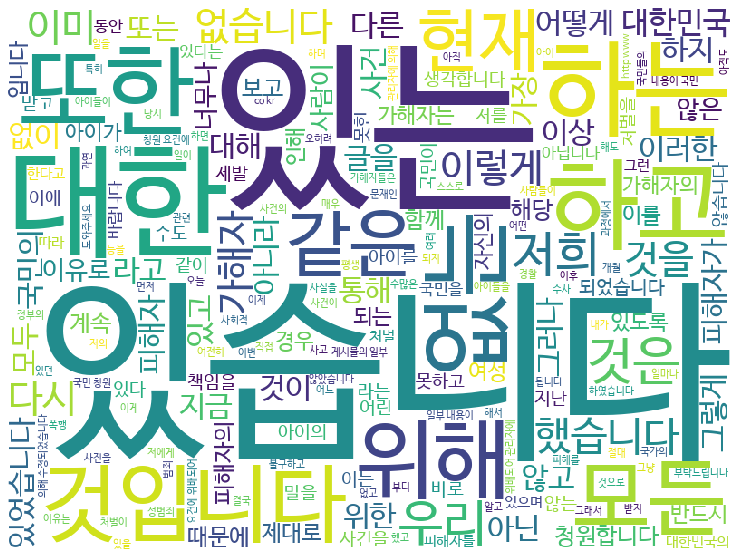

CPU times: user 1.88 s, sys: 136 ms, total: 2.01 s
Wall time: 2.03 s


In [106]:
%time displayWordCloud(' '.join(sentences))

불용어가 많다.

In [107]:
from soynlp.noun import LRNounExtractor

In [108]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (4661, 2404) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 1219 nouns are extracted
CPU times: user 682 ms, sys: 8.28 ms, total: 690 ms
Wall time: 692 ms


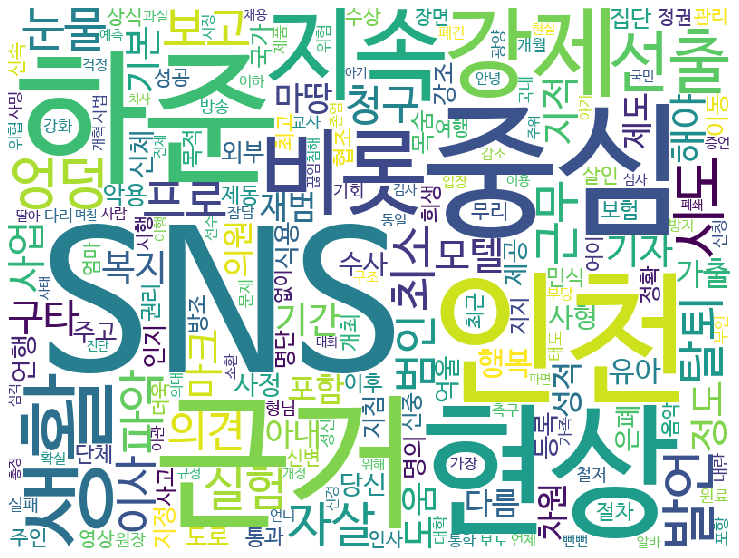

CPU times: user 1.38 s, sys: 124 ms, total: 1.5 s
Wall time: 1.52 s


In [109]:
%time displayWordCloud(' '.join(nouns))

불용어를 어떻게 처리할지가 관건이네